## Tesla Stock Analysis

In [31]:
import os
import sys
import hashlib
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

### Data collection and Data Parsing

In [32]:
# Tesla Stock information read in using read_html, dates are automatically parsed. [1,0,2] as in european format DD/MM/YYYY
dataframes = pd.read_html('http://mlg.ucd.ie/modules/COMP30760/stocks/tlsa.html', parse_dates= {'Date' : [1, 0, 2]})

# Concatanates list of 'dataframes' into a single dataframe called 'df'
df = pd.concat(dataframes)

# 'Date' column set as index
df = df.set_index('Date')

# Dataframe Transformations for later Analysis
# Creates 'Returns' column which holds value of the daily change of Close as percentage
df['Returns'] = df['Close'].pct_change(1)

# Creates 'Range' column which holds absolute difference value of High and Low value of each date
df['Range'] = abs(df.High.values - df.Low.values)

# Returns shape of the dataframe
df.head()

,Open,High,Low,Close,Returns,Range
Date,,,,,,
2013-01-02,35.000000,35.450001,34.709999,35.360001,NaN,0.740002
2013-01-03,35.180000,35.450001,34.750000,34.770000,-0.016686,0.700001
2013-01-04,34.799999,34.799999,33.919998,34.400002,-0.010641,0.880001
2013-01-07,34.799999,34.799999,33.900002,34.340000,-0.001744,0.899997
2013-01-08,34.500000,34.500000,33.110001,33.680000,-0.019220,1.389999


##### Some Matplotlib Configurations

In [33]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 22

## Functions used to visualise Intitial Analysis

I have made two separate functions to visualise the Stock information collected. They both have similar functionality. I deemed it necessary to create two seperate functions to make my notebook more concise and easy to understand.

The first function - **resamplePlot** - aims to create a plot of a certain time period inputted e.g Monthly.

In [37]:
# The resamplePlot function is defined that takes in two arguments.
def resamplePlot(tme_str, title_str):
    # Separate Series are made for resampled Open, Close, High and Low fields. 
    # Resampled using 'tme_str' that is inputted. e.g 'M' will get monthly
    OpenVals = df.Open.resample(tme_str).ffill() # ffill() used to fill in weekends with values
    CloseVals = df.Close.resample(tme_str).ffill()
    HighVals = df.High.resample(tme_str).max().ffill() # max() and min() used to get max High and min Low values 
    LowVals = df.Low.resample(tme_str).min().ffill()
    
    # Resampled Series are concatanated into a dataframe that is then plotted
    ax = pd.concat([OpenVals,CloseVals,HighVals,LowVals],axis=1).plot(figsize=(20,5))
    ax.set_title(title_str)
    ax.set_ylabel("Stock Price")
    ax.legend(['Open', 'Close', 'High', 'Low'],
         frameon=True, ncol=2, loc='upper left')

The second function - **resampleSubplot** - aims to create a plot of a certain time period inputted but also seperates the subplots present e.g a seperate graph for each field - Open, Close etc. This allows the lines to be more distinguisable

In [38]:
# The resampleSubplot function is defined that takes in two arguments.
def resampleSubplots(tme_str, title_str):
    # Separate Series are made for resampled Open, Close, High and Low fields. 
    # Resampled using 'tme_str' that is inputted. e.g 'M' will get monthly
    OpenVals = df.Open.resample(tme_str).ffill()
    CloseVals = df.Close.resample(tme_str).ffill()
    HighVals = df.High.resample(tme_str).max().ffill()
    LowVals = df.Low.resample(tme_str).min().ffill()
    
    # Resampled Series are concatanated into a dataframe that is then plotted. Subplots are plotted in this function.
    ax = pd.concat([OpenVals,CloseVals,HighVals,LowVals],axis=1).plot(subplots=True, figsize=(20,20), sharex=True, sharey=True)
    ax[0].set_title(title_str)
    for t in ax:
        t.set_ylabel("Stock Price")

## Initial Data Analysis
I decided that the first thing to do after Collecting and Parsing the data is to get a brief idea of what sort of trends the **Tesla Stock** had at **Daily, Monthly, Annual and Quaterly** intervals. I did this using the two functions I declared above to plot the two types of plots I would use for this initial understanding/examination.

### Daily Tesla Stock Price

My aim before doing this daily Stock Price plotting was to get a glimpe of the fluctuations of Tesla's Stock Price.

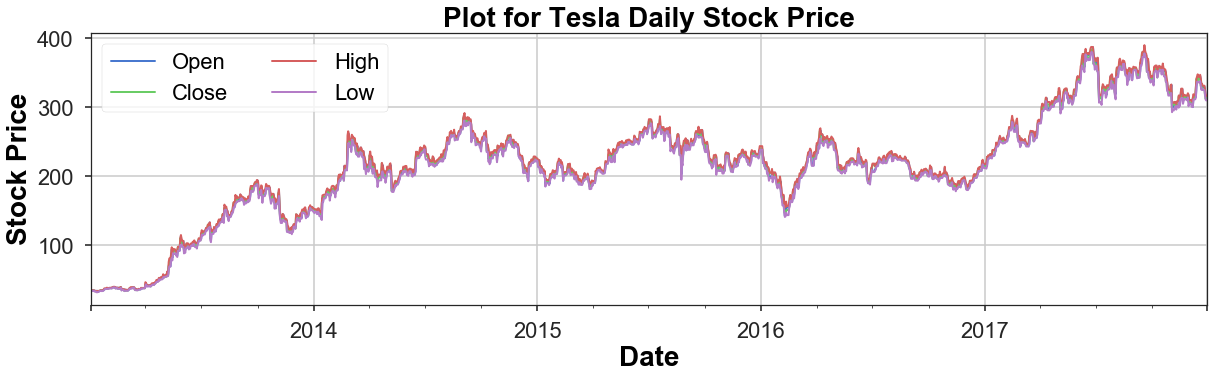

In [39]:
# 'D' is passed as the argument so daily can be used from the resample method. The title of the plot is also passed.
resamplePlot('D', "Plot for Tesla Daily Stock Price")

It is very hard to determine which line is which in the above graph so I decided to plot each subplot separately using my second function.

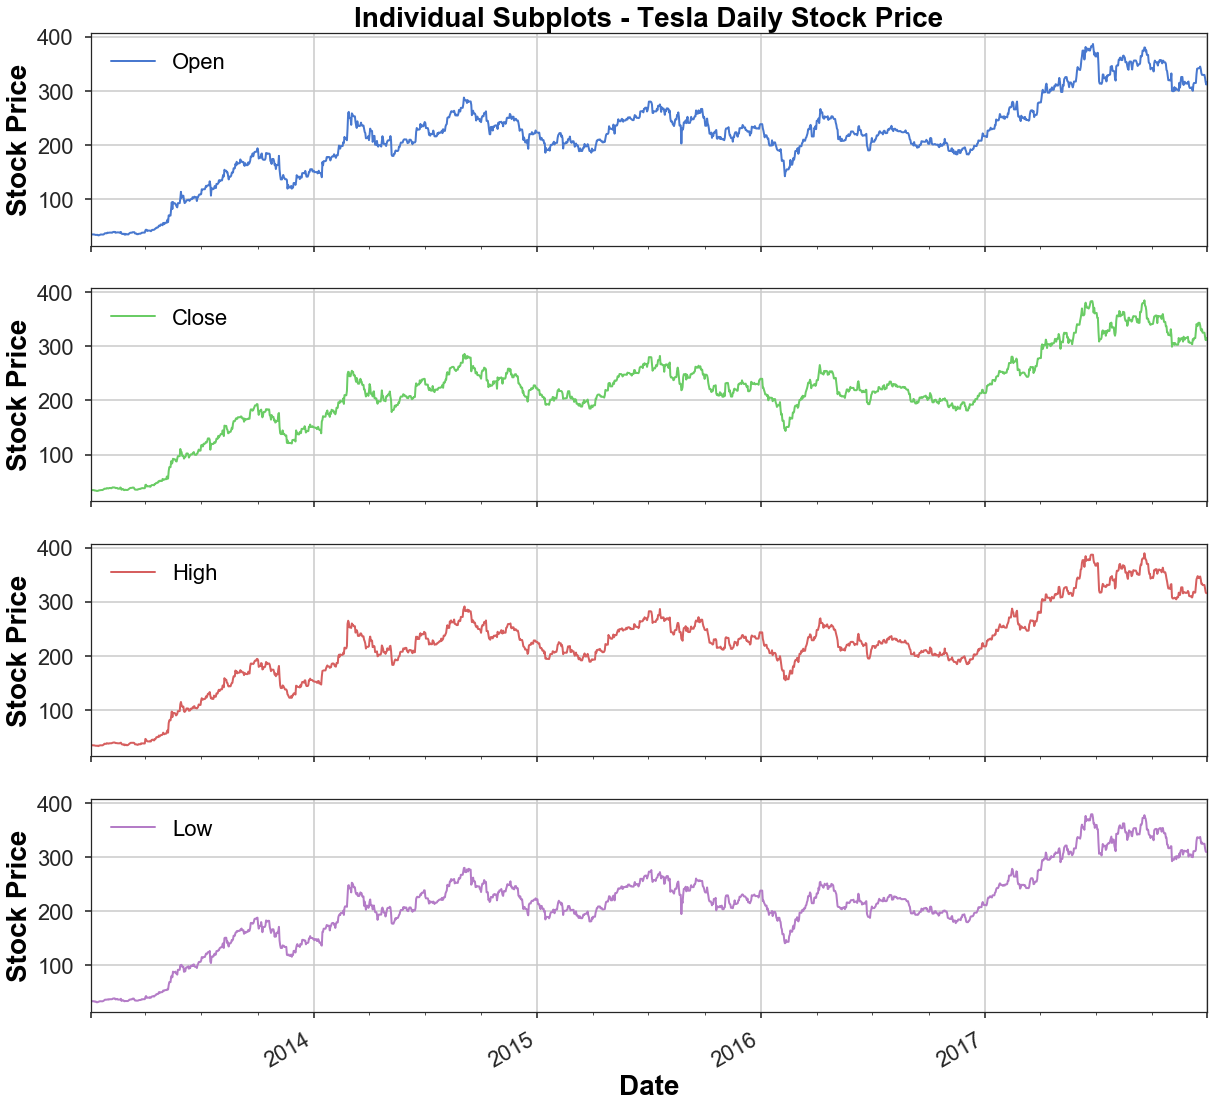

In [8]:
# 'D' is passed as the argument so daily can be used from the resample method. The title of the plot is also passed.
resampleSubplots('D', "Individual Subplots - Tesla Daily Stock Price")

### Monthly Tesla Stock Price

I expected the plot of the monthly Tesla Stock Price to give a more effective view of the overall trend. This is exactly what it did as the positive, increasing trend can be seen.

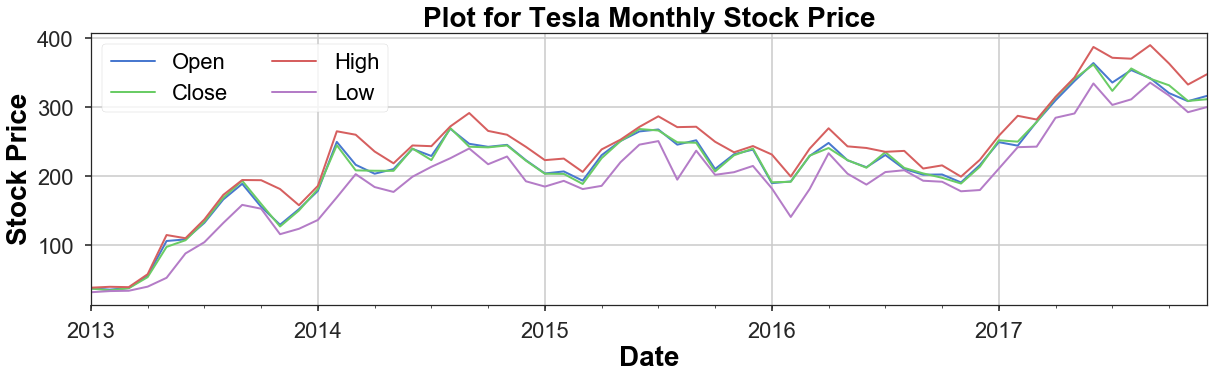

In [9]:
# 'M' is passed as the argument so monthly can be used from the resample method. The title of the plot is also passed.
resamplePlot('M', "Plot for Tesla Monthly Stock Price")

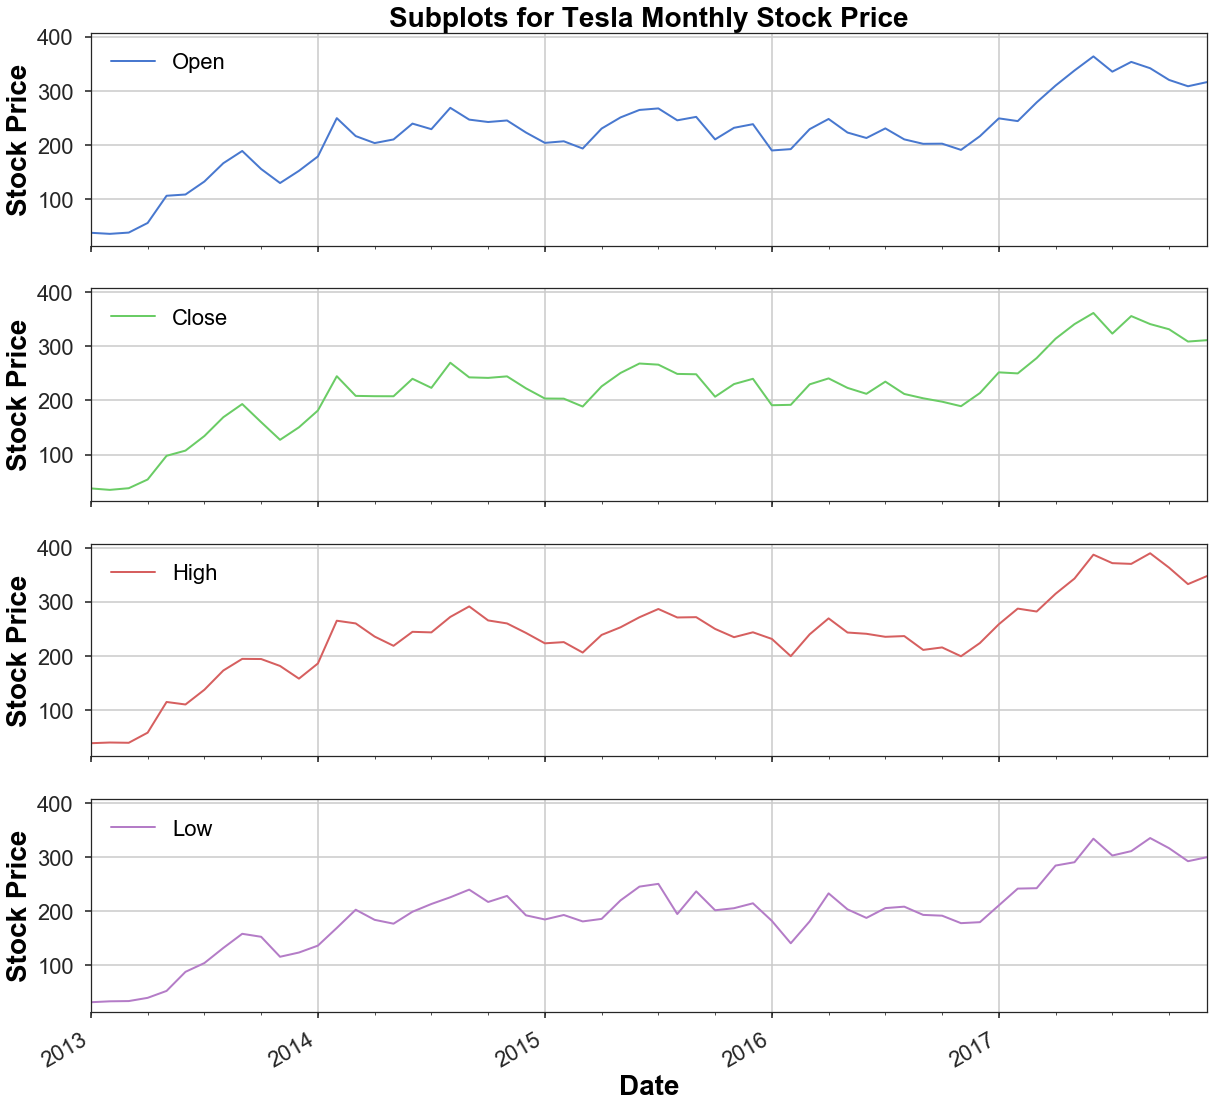

In [10]:
# 'M' is passed as the argument so monthly can be used from the resample method. The title of the plot is also passed.
resampleSubplots('M', "Subplots for Tesla Monthly Stock Price")

### Annual Tesla Stock Price

The following plots visualise Tesla's annual stock price.

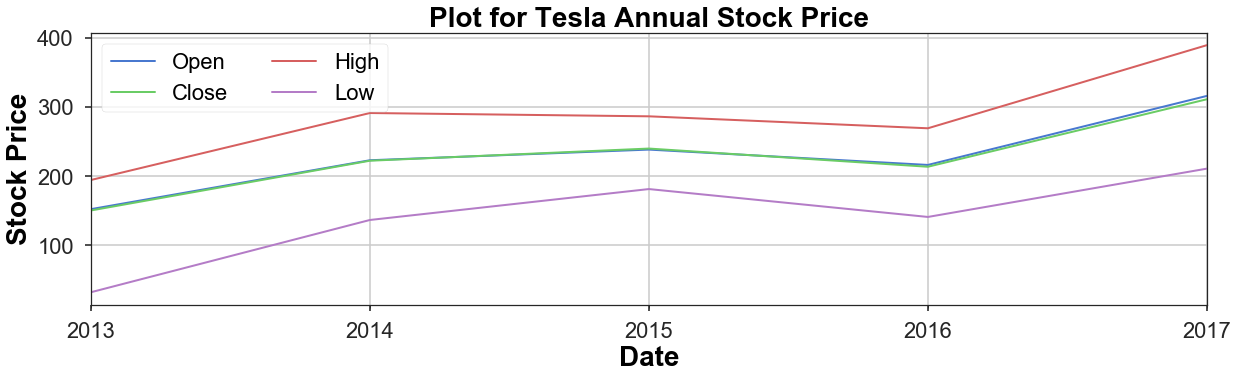

In [11]:
# 'A' is passed as the argument so annual can be used from the resample method in function. The title of the plot is also passed.
resamplePlot('A', "Plot for Tesla Annual Stock Price")

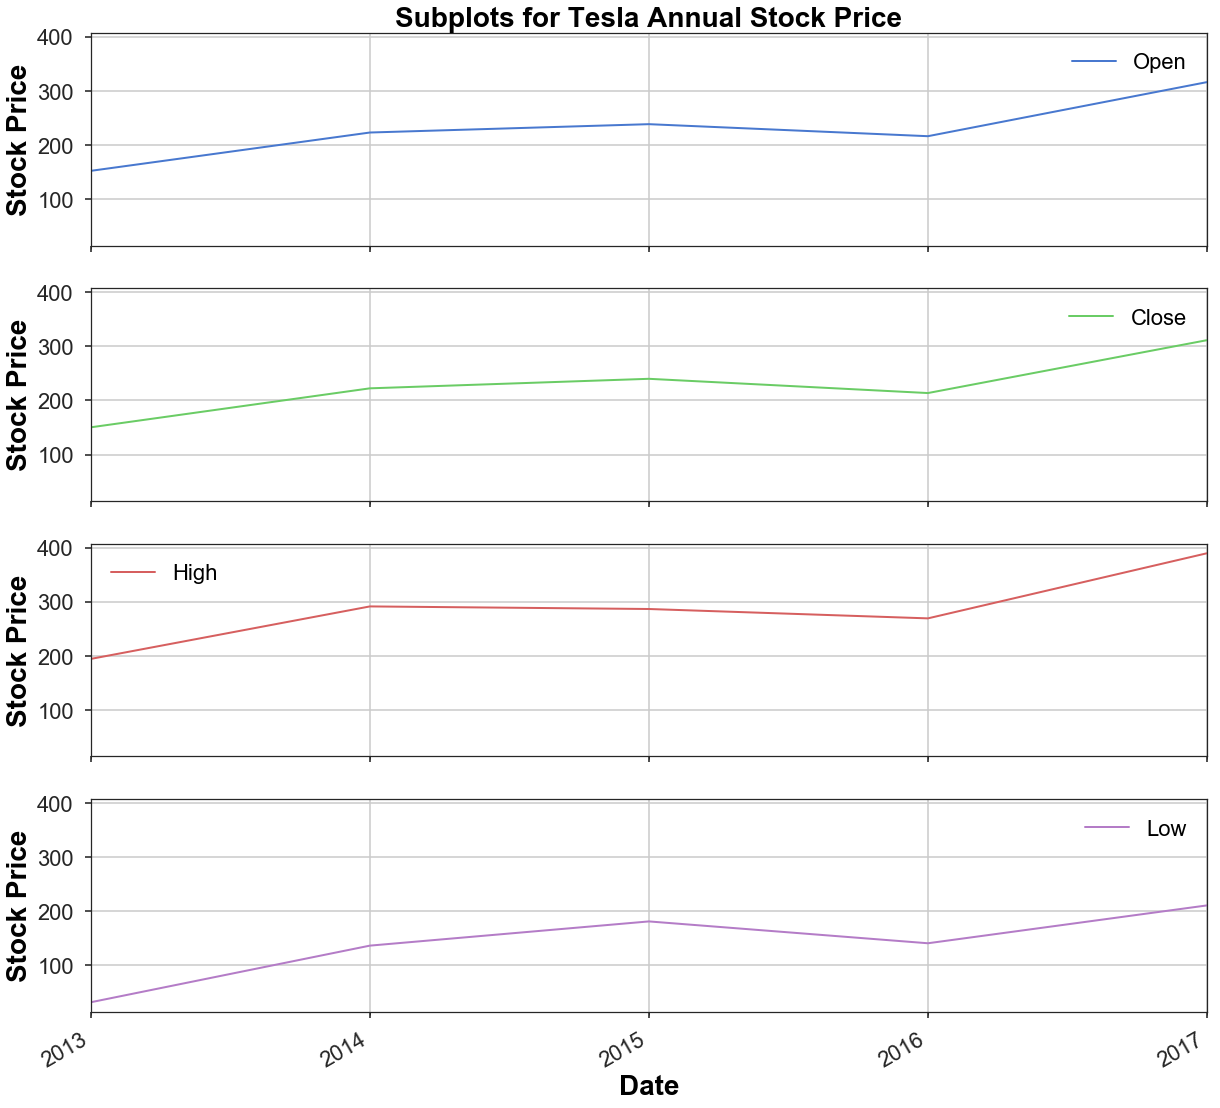

In [12]:
# 'A' is passed as the argument so annual can be used from the resample method in function. The title of the plot is also passed.
resampleSubplots('A', "Subplots for Tesla Annual Stock Price")

### Quaterly Tesla Stock Price

The following plots visualise Tesla's quaterly stock price.

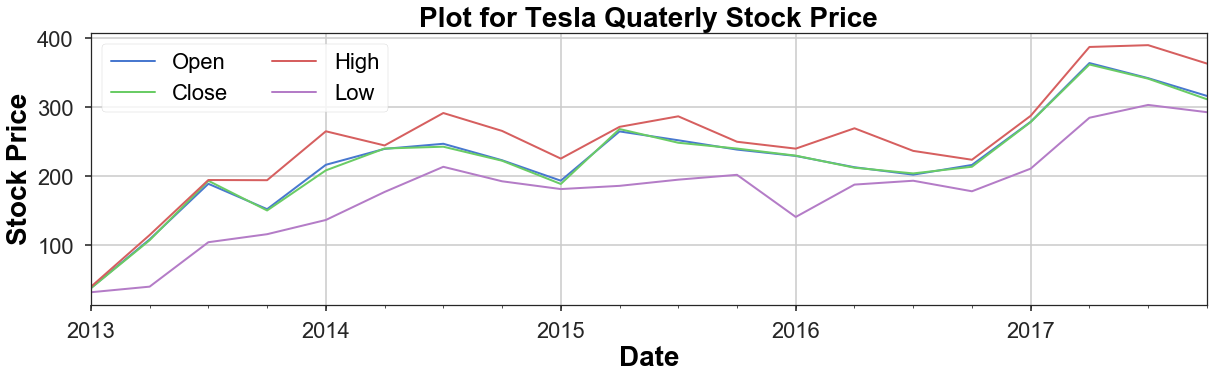

In [13]:
# 'Q' is passed as the argument so quaterly can be used from the resample method. The title of the plot is also passed.
resamplePlot('Q', "Plot for Tesla Quaterly Stock Price")

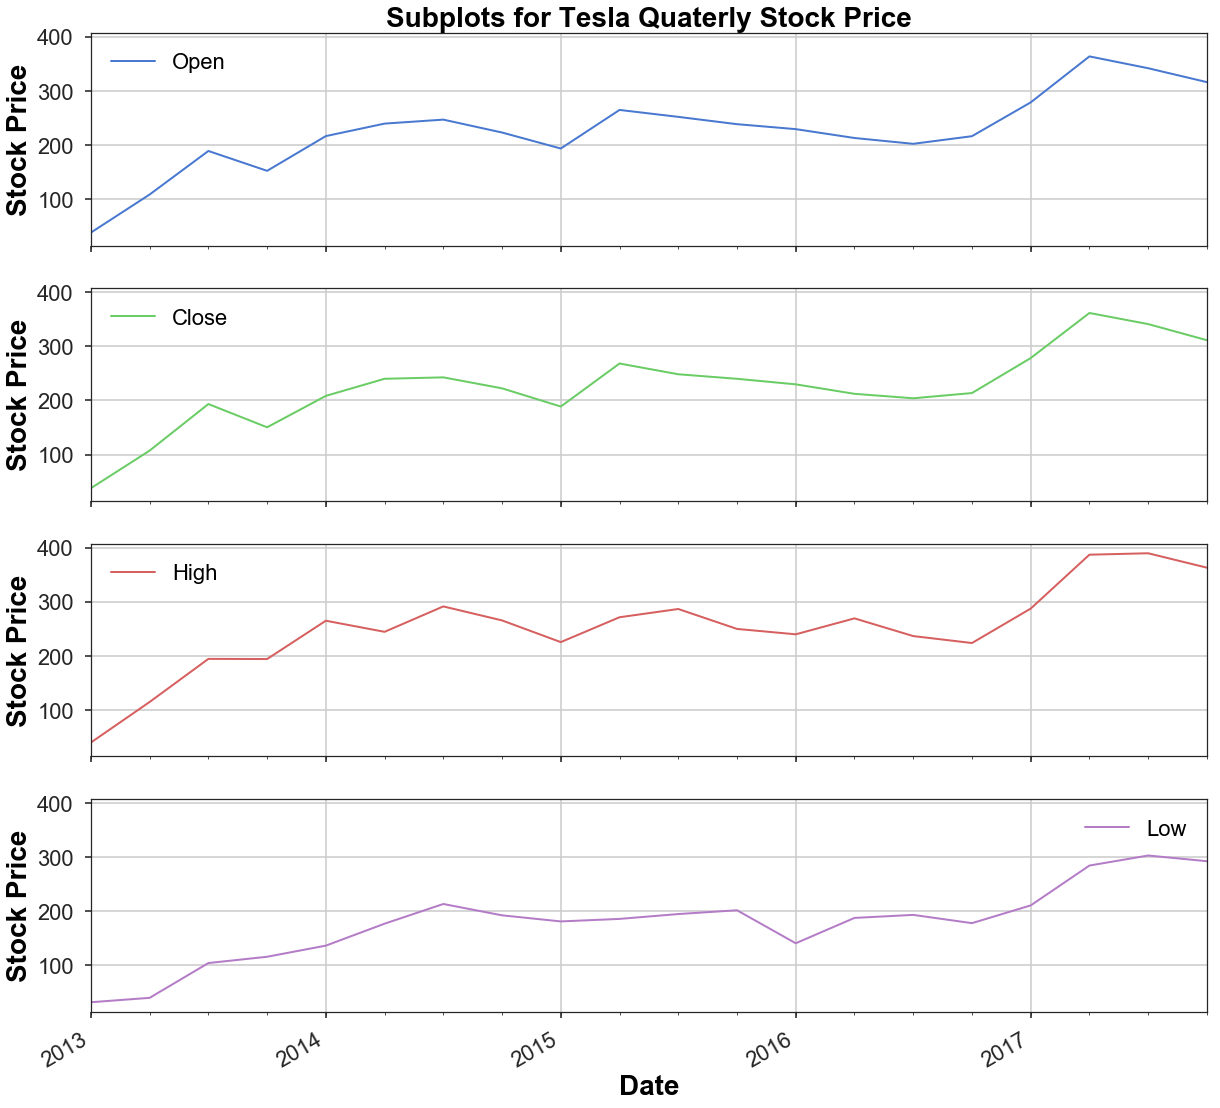

In [14]:
# 'Q' is passed as the argument so quaterly can be used from the resample method. The title of the plot is also passed.
resampleSubplots('Q', "Subplots for Tesla Quaterly Stock Price")

## Conclusion of Initial Analysis

I learnt a lot regarding the trend of Tesla's stock from these visualisations. It can be see that once the stock increased a peak of roughly **200 dollars in mid 2014**, it began to even off and slightly dip in some cases. In **late 2016** the Stock price began to rise again and **surpassed 300 dollars in late 2017**. It was interesting to see the overall trends of the Stock Price from the Yearly and Quaterly visualisations as well as seeing the different drops in price in the Daily and Monthly visualisations. After doing this initial analysis, I wanted to go into a bit more depth on the trends present in the data.

# Trends Analysis

After my initial analysis of the trends in Tesla's Stock, I decided to further investigate the following: 
- Overall trend of the Closing value of the stock using moving averages.
- Further analysis of the Range (difference between High and Low) of Tesla's Stock.
- The distribution of the Daily Returns (difference between Open and Close) of Tesla's Stock.

### Moving Average (60 days) of Tesla Stock Price Close Price

After examining the plot the daily stock price of Tesla, I wanted to analyse the overall trend of the graph. I figured that Moving averages would be the most effective way of demonstrating this as they are commonly used to smooth out short-term fluctuations and highlight longer-term trends or cycles.

I chose 60 days as the rolling value for the mean as it smoothened out the short term fluctuations effectively. 

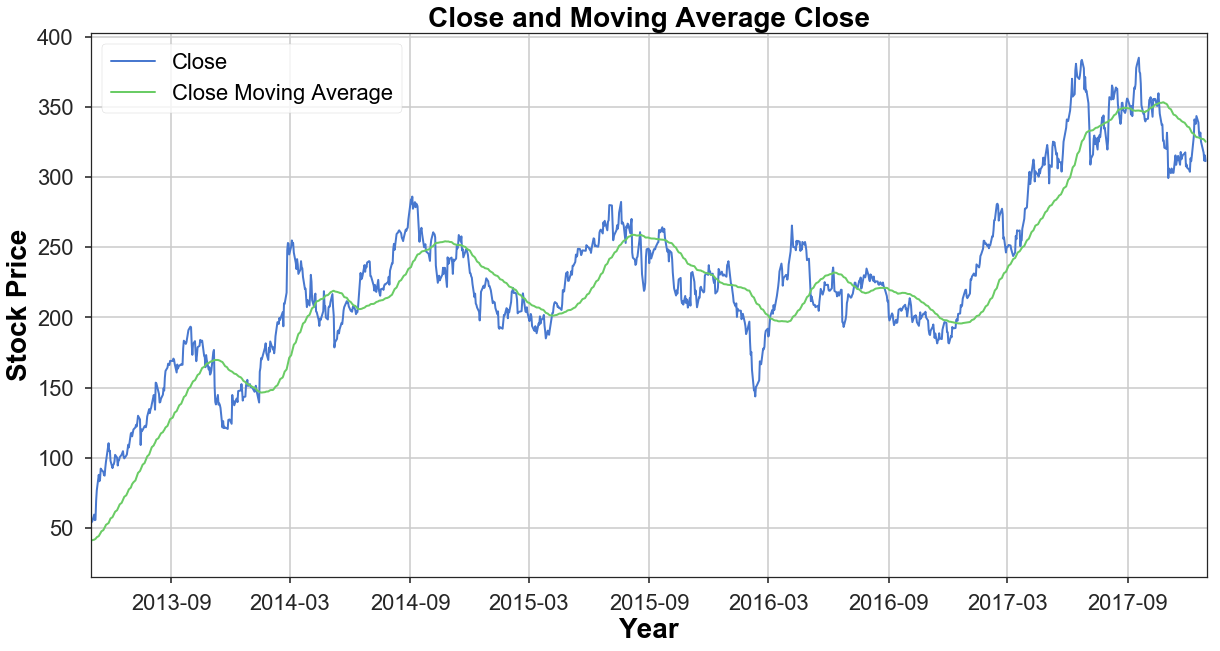

In [249]:
# 'Close_MA_60' created to hold value of the rolling/moving average of Close field
df['Close_MA_60'] = df.Close.rolling(60).mean()

# Plot created with grid and all necessary adjustments
fig, ax = plt.subplots(figsize=(20,10))
plt.grid(True)
ax.set_title("Close and Moving Average Close")
ax.plot(df['Close'])
ax.plot(df['Close_MA_60'])
ax.set_xlabel("Year")
ax.set_ylabel("Stock Price")
ax.set_xlim('2013-05','2017-12-31')
ax.legend(['Close', 'Close Moving Average'], frameon=True)

**Conclusion**:

This resulted in the prominent increasing, positive trend that can be seen by Tesla's Stock Price. It has steadily increased from below 50 in early 2013 to briefly eclipsing 350 in **late 2017**. 
There can be seen to be a few dips in the Moving Average plot and even a slight decreasing trend from **late 2015 to early 2016**. However, the Tesla's Stock Price recovered and had a steep increase in **early-mid 2017**. 

### Range analysis of Tesla's Stock

The Range column holds the absolute difference value of the High and Low value of each date. Firstly, I wanted to sort these values to see what date had the highest fluctuation of Stock Price and what this value was.

In [250]:
df['Range'].sort_values(ascending=False).head(5)

Date
2015-08-24    36.399994
2014-02-25    30.750015
2015-10-20    26.600006
2014-01-14    25.330002
2014-09-15    25.269989
Name: Range, dtype: float64

It was interesting to see on a given date there was a 36.4 fluctuation of Tesla's Stock Price. My next step was to use a visualisation to show this. All of the top 5 fluctuations were within the 2014-2016 years. I highlighted the top two dates which had the greatest Range value in the green.

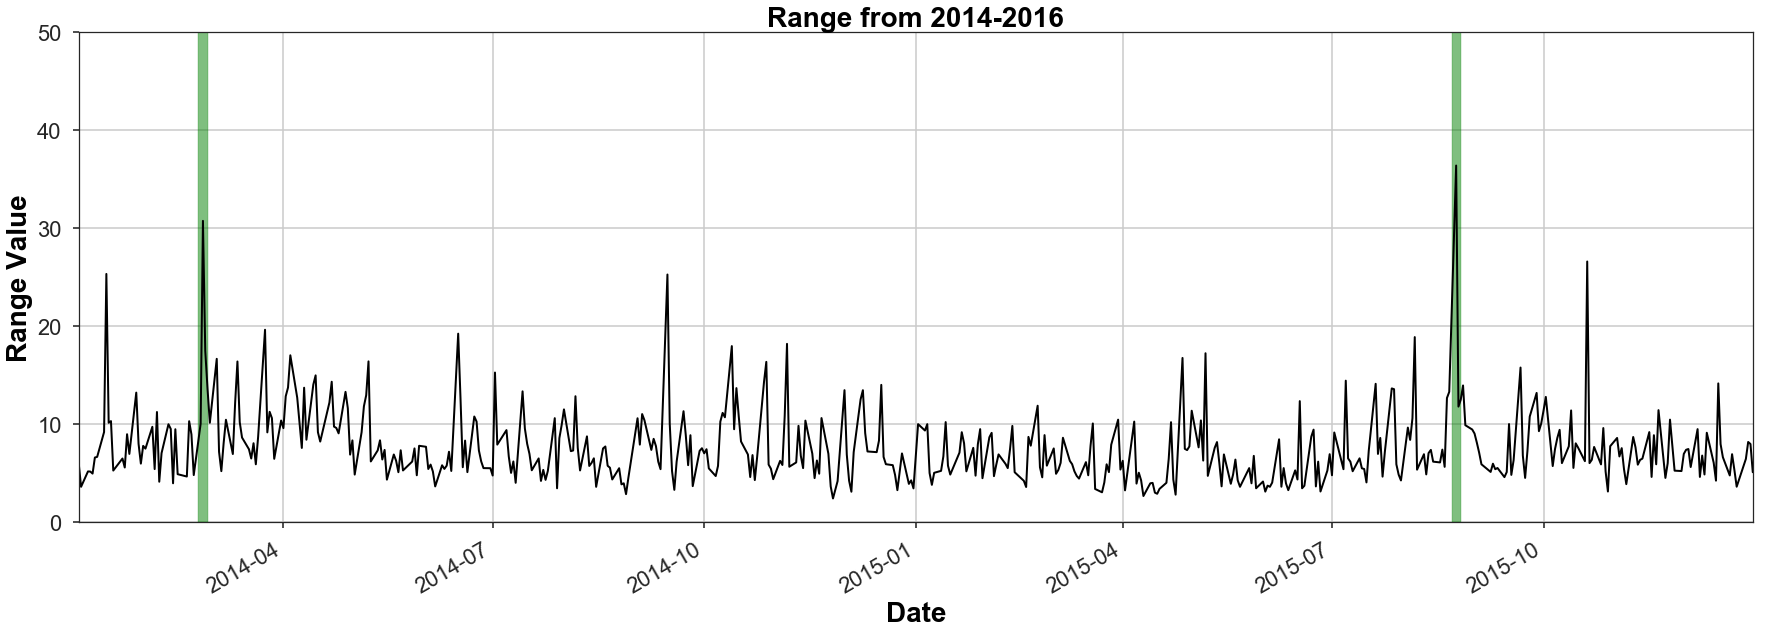

In [251]:
ax = df['Range']['2014':'2016-01-01'].plot(figsize=(30,10), color='black')
ax.set_title("Range from 2014-2016")
ax.set_ylim(0,50)
ax.set_ylabel("Range Value")
ax.axvspan('2014-02-23', '2014-02-27', color='g', alpha=0.5)
ax.axvspan('2015-08-22', '2015-08-26', color='g', alpha=0.5)

**Conclusion:**

It was interesting to see the constant peaks throughout the visualisation. Both of the top two peaks are very intriguing as they both eclipse 30 whereas the majority of other peaks barely surpass 20. I would proceed to investigate what the potential correlations that could be concluded from these top two range values. My brief investigation of these dates did not help me find any correlations between these two dates and the range value. It is very intriguing nonetheless.

### The distribution of the Daily Returns on Tesla's Stock.

I transformed the initial datframe to include a column named Returns as I mentioned in my Data Collection and Parsing section. This field calculates the percentage change of the Close field day to day. After my initial analysis, I was eager to see what the distribution of this was.

Firstly, I wanted to see the top five highest Daily Returns dates over the 5 year period in the data.

In [30]:
df['Returns'].sort_values(ascending=False).head(5)

Date
2013-05-09    0.243951
2013-12-03    0.165338
2013-04-01    0.159409
2014-01-14    0.157385
2013-05-13    0.143825
Name: Returns, dtype: float64

Secondly, I wanted to visualise this Daily returns field to get a glimpse of potential fluctuations.

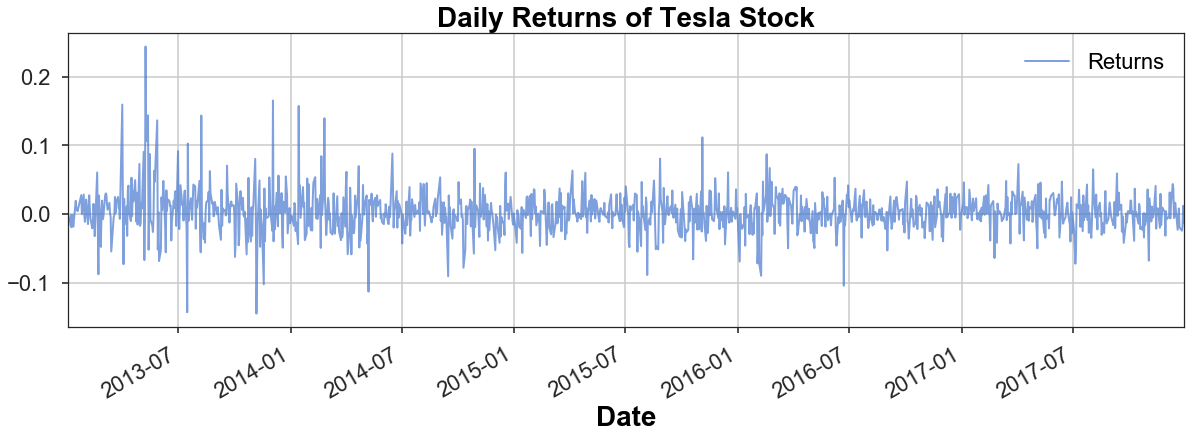

In [29]:
ax = df['Returns'].plot(title='Daily Returns of Tesla Stock', figsize=(20,6) ,alpha=0.7)
ax.legend()

After seeing this, I realised a more effective visualisation would be to see the distribution of the Daily Returns on Tesla's Stock.

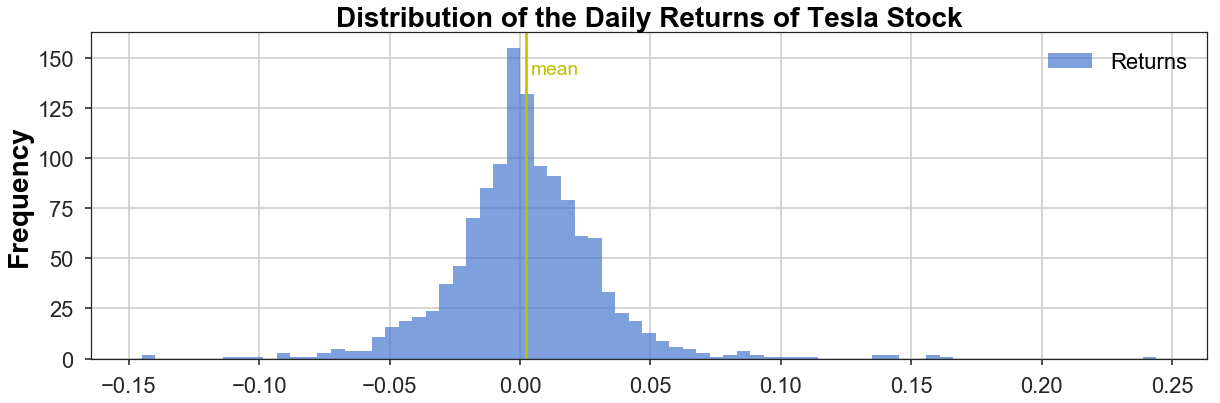

In [26]:
ax = df['Returns'].plot.hist(title='Distribution of the Daily Returns of Tesla Stock', figsize=(20,6),bins=75,alpha=0.7)
# Calculates the mean value for Returns and plots it on visualisation
ax.axvline(df.Returns.mean(), lw=2.5, color='y')
ax.text(0.004,142,"mean", color='y')
ax.legend()

**Conclusion:**

It was fascinating to see the distribution of the returns of Tesla's Stock. The **mean** of the daily returns is **just above zero**, as seen above. This could potentially suggest that the distibution is slightly skewed to the right. From our previous analysis, this would make sense as Tesla's stock has been increasing more so than decreasing in recent times. I feel this was a very effective visualisation to get an overall understanding of Tesla's Stock Data

## Overall Conclusion of Analysis

I found the exploration of Tesla's stock very interesting overall. There was a drastic increase in its value in 2017 which did not surprise me as I was aware that the company had released a myriad of different car models that were successful. Tesla is seen as the future of electric cars but also the technology used by the cars. Since its Initial Public Offering in early 2013, it had an immediate increase in value for the year. It was also interesting seeing the slight dip in value in late 2015 / early 2016.

I believe the visualisations I have used effectively show the different trends present in the data. Another part of analysis that intrigued me hugely was the different peaks of the Range values. It was fascinating to see that there was a 30+ dollar difference in value of Tesla's stock on two particular dates.
Finally, it was very interesting to see the overall distribution of the daily returns of Tesla's stock. This was something I wanted to visualise once I chose this Stock Data for the assignment.